## Bounds on the deviation of binary sums from their mean

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Generate a binary sequence of length $n$ with probability of $1$ being p

In [2]:
from numpy.random import rand
def rand_bin_seq(p=0.8,n=10):
    return 1.*(rand(n)<p)
rand_bin_seq(0.1,20)  #para1: p, para2: number

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [15]:
#compute the empirical probability = the fraction of 1's at each prefix of the sequence.
def estimate(A):
    return np.divide(cumsum(A),arange(1,len(A)+1,1))   
#cumsum will build a new array with each element represent the sum till this element in the origin array
estimate(rand_bin_seq())

array([ 1.        ,  1.        ,  1.        ,  0.75      ,  0.8       ,
        0.83333333,  0.85714286,  0.75      ,  0.77777778,  0.8       ])

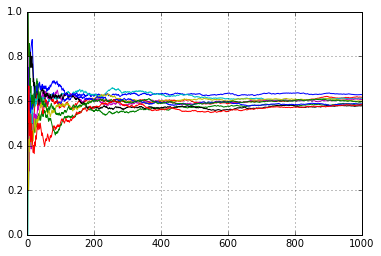

In [16]:
for i in range(10):
    plot(estimate(rand_bin_seq(p=0.6,n=1000)))
ylim([0,1])
#xlim([0,400])
grid()

#This will converge to p, since the total number of 1 divide the total number of elements should be around p

### Rate of convergence to the mean.
It is clear that the empirical probability converges to the true probability. This is called **the law of large numbers**. However, we want to know **The Rate** of this convergence.

## Setup

Our goal is to give rigorous finite sample bounds on the deviation of the sum of IID RV from the expected value.

We define a sequence of $m$ binary random variables  $X_1, X_2, \ldots , X_m$ that are 
Independent and Identically distributed:

$$ X_i = \begin{cases} 1, & \mbox{with probability $p$} \\ 
                       0, & \mbox{with probability $1-p$}
         \end{cases}
$$

The fraction of times in which event ``$X_i=1$'' occurs is equal to
$\hat{p} = \frac{1}{m} \sum^m_{i=1} X_i$, this is the **empirical**
estimate of $p$. 

### The estimator is unbiased
It is easy to show that the **expected value** of $X_i$ is $p$:
$$E(X_i) = (1 \times p) + (0 \times (1-p)) = p $$

and from the linearity of expectations and the definition of $\hat{p}$ we get that 
$$E(\hat{p}) = E\left( \frac{1}{m} \sum^m_{i=1} X_i \right) = \frac{1}{m} \sum^m_{i=1} E(X_i) = p $$

This means that $\hat{p}$ is an **unbiased** estimator of $p$. 

### Bound based on Central Limit Theorem
As the $X_i$'s are IID, We have a similar equation for the variance of $\hat{p}$.

$$Var(\hat{p}) = Var\left( \frac{1}{m} \sum^m_{i=1} X_i \right) = \frac{1}{m^2} \sum^m_{i=1} Var(X_i) =  \frac{Var(X_i)}{m} = \frac{p(1-p)}{m}$$

The central limit theorem states that if the $X_i's$ are IID then the distribution of $\frac{1}{m}\sum^m_{i=1} X_i$ 
converges to the normal distribution with mean $p$ and standard deviation $\sqrt{\frac{p(1-p)}{m}}$. This gives us a good order of magnitude estimate of the distance between $\hat{p}$ and $p$. However, this estimate is often too crude to use in practice. The central limit theorem is exact only when $m \to \infty$ but the number of training examples we have might not be large enough for this approximation to be useful. 

### Uniform convergence bounds
Our next goal is to prove that, with high probability, $\hat{p}$ is close to $p$.

We start by proving Sanov bound, from which we can derive the simpler but looser Chernoff and Hoeffding bounds. (The latter are tighter than Sanov in more general settings which we will note discuss here).

## Sanov bound

We start by stating and proving Sanov bound, which is the tightest bound of this kind for sums of IID binary random variables.

Let $p$,$\hat{p}$,$m$ are as defined above. We upper bound the probability that $\hat{p}$ is far from $p$. We use a thrshold $q$ and consider two cases:

1. For any $q > p$, $$P[\hat{p}>q] \leq e^{-m D_{KL}(q||p)} $$
1. For any $q < p$, $$P[\hat{p}<q] \leq e^{-m D_{KL}(q||p)} $$ 

In above, **it is $D_{KL}(q||p)$ not $D_{KL}(p||q)$**

Where $D_{KL}(q||p)$ is the **Kullback-Liebler** divergence defined (for binary random variables) as 

$$ D_{KL}(q||p) \doteq q \ln \frac{q}{p} + (1-q) \ln \frac{1-q}{1-p} $$

## The Kullback-Liebler Divergence ##
The KL divergence is a measure of the distance between two distributions that is popular in information theory. It is never negative $D_{KL}(q||p)\geq 0$ and is **equal to zero in and only if $p=q$**.  
In general $D_{KL}(q||p) \neq D_{KL}(p||q)$ which is why it is called a **divergence** rather than a **distance**  


In [17]:
def DKL(q,p):
    return q*log(q/p)+(1-q)*log((1-q)/(1-p))

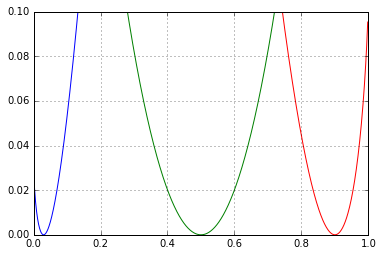

In [18]:
Q=arange(0.001,0.999,0.001)
P=[0.03,0.5,0.9]
for p in P:
    plot(Q,array([DKL(q,p) for q in Q]))
ylim([0,0.1]);
grid();

## The property of KL divergence, narrower when p is smaller.

Observe that the minimum of the KL divergence is always achieved when $p=q$.  
Note also that the rise of the KL devirgence from zero is much steeper when $q=0.03$ than when $q=0.7$ which is slightly steeper than the rise for $q=0.5$. As we will see, this is a significant fact when considering the convergence rates for binary random variables with different values of $p$.

## Markov Inequality

$X \geq 0$ is a random variable.

Then $\forall a > 0$: $$(x \geq a) \leq \frac{E(x)}{a}$$



## Proof Of Sanov's bound ##

$\newcommand{\Prob}[1]{P \left[ #1 \right]}$
$\newcommand{\E}[1]{E \left[ #1 \right]}$

Our goal is to show that, with high probability, this estimate
($\hat{p}$) is pretty good.  Specifically, we want to upper bound the
probability $\Prob{\hat{p} \geq q}$ for any $q > p$.

The main idea of the derivation is to combine Markov's inequality
with the fact that **the expected value of a product of 
*independent* random variables $Z_1,\ldots,Z_n$ is equal to the product of the
expectations, $\E{\prod_i Z_i} = \prod_i \E{Z_i}$.** 

We start by transforming the sum of random variables into a
product. To do that we exponentiate the sum $\hat{p} = \frac{1}{m}
\sum^m_{i=1} X_i$.  Let $\lambda > 0$ be a parameter whose value will
be chosen later. For any fixed $m>0$,$\lambda > 0 $ the function $e^{m \lambda q}$
is monotone increasing in $q$. Thus
$$\Prob{\hat{p} \geq q} = \Prob{e^{m \lambda \hat{p}} \geq e^{m \lambda q}}$$

As $e^{m\lambda \hat{p}}$ is always larger than zero, we can use
Markov's inequality to get
$$\E{e^{m\lambda \hat{p}}} \geq 
e^{m\lambda q} \Prob{e^{m\lambda \hat{p}} \geq e^{m\lambda q}} $$
from which we get **Equation (1)**
$$
\Prob{\hat{p} \geq q} \leq  e^{-m \lambda q}\E{e^{m\lambda \hat{p}}}.
$$

Plugging the definition of $\hat{p}$ into the expression of the
expectation, we get that
$$\E{e^{m\lambda \hat{p}}} = \E{e^{\lambda \sum_{i=1}^m x_i}} =
  \E{\prod_{i=1}^m e^{\lambda x_i}}.$$

As $x_i$ are independent of each other, so are $e^{\lambda x_i}$. We
are now ready to use the fact that the product of independent random
variables is equal to the product of the expected values.
$$
\E{e^{m\lambda \hat{p}}} = 
\prod_{i=1}^m \E{e^{\lambda x_i}} = 
\prod_{i=1}^m \left[p e^{\lambda} + (1-p) e^0 \right] = 
\left[p e^{\lambda} + (1-p)\right]^m
$$

We have thus expressed $\E{e^{m\lambda \hat{p}}}$ as a product of
expectations, each of which is expressed as a sum over the two
possible states of $x_i$. As all the $x_i$ are identically
distributed, the expressions are identical for all $m$ random
variables. Combining this expression with Equation (1) we get
$$ \Prob{\hat{p} > q} \leq e^{-m\lambda q} [p e^{\lambda} + (1-p)]^m $$
apply $\ln$ to both sides:
$$ \ln \Prob{\hat{p} \geq q} \leq \ln \frac{ [p e^{\lambda} + (1-p)]^m}{e^{m\lambda q}} =m \ln  [p e^{\lambda} + (1-p)] - m\lambda q \nonumber $$
and we exponentiate both sides to get **Equation (2)**
$$\Prob{\hat{p} \geq q}) \leq e^{-m\lambda q + m \ln [p e^{\lambda} + (1-p)]} $$

We define $f_{\lambda}(q,p) \doteq \lambda q - \ln[p e^{\lambda} +
(1-p)]$ which simplifies **Equation (2)** to **Equation (3)**
$$
\Prob{\hat{p} > q} \leq e^{-m f_{\lambda}(q,p)}
$$

Note that $f_{\lambda}(q,p)$ does not depend on $m$, the number of
samples; this means that **if we can find $\lambda$ so that that
$f_{\lambda}(q,p) > 0$ then we get an upper bound on the probability
that decreases exponentially as $m$ increases.**  To get the tightest
possible bound, we wish to find the value of $\lambda$ that maximizes
$f_{\lambda}(q,p)$.  
We do that by requiring the partial derivative of $f_{\lambda}(q,p)$ with respect to $\lambda$ be equal zero. We denote the value of $\lambda$ that achieves this zero derivative $\lambda^*$:  
$$ f_{\lambda}(q,p) =  \lambda q - \ln[p e^\lambda + (1-p)] $$
$$ 0 = \frac{\partial f}{\partial \lambda }=q-\frac{p e^{\lambda^*}}{p e^{\lambda^*} + (1-p)}$$
$$ q\left( p e^{\lambda^*} + (1-p) \right) = p e^{\lambda^*} $$
$$e^{\lambda^*} ( p - q p ) =  q - q p $$
$$e^{\lambda^*} =  \frac{q(1-p)}{p(1-q)} $$
and we find the optimal setting of $\lambda$ is
$$\lambda^*  =  \ln \frac{q(1-p)}{p(1-q)} $$

Plugging $\lambda^*$ into the definition of $f_{\lambda}(q,p)$ gives us that
$$
f_{\lambda^*}(q,p) = q \ln \frac{q}{p} + (1-q) \ln \frac{1-q}{1-p}=D_{KL}(q||p)
$$
And plugging this back into **Equation 3** we get the statement of the theorem:
$$
\Prob{\hat{p} > q} \leq e^{-m D_{KL}(q||p)}
$$

# Hoeffding bound

As it turns out, Sanov bound is the tightest bound on the variation from the mean of the form $e^{-m C}$.
However the KL divergence form is not always easy to understand.  
A bound that is easier to interpret is the Hoeffding bound, which we mention here.

One can check that $D_{KL}(q||p) \geq 2(q-p)^2$. From this inequality we get that  
if $q>p$ then
$
\Prob{\hat{p} > q} \leq e^{-2m (p-q)^2}
$
and if $q<p$ then
$
\Prob{\hat{p} < q} \leq e^{-2m (p-q)^2}
$  

Combining the two cases we get that 
$$
\Prob{|\hat{p}-p|>\epsilon^2} \leq 2e^{-2m\epsilon^2}
$$


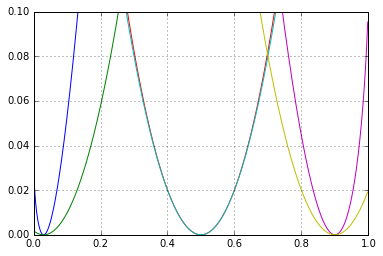

In [24]:
for p in P:
    plot(Q,array([DKL(q,p) for q in Q]))
    plot(Q,array([2*(q-p)**2 for q in Q]))
ylim([0,0.1])
grid();

We see that Hoeffding's bound is tight when $p=0.5$ but loose at $p=0.03$ or $p=0.9$.

## Multiplicative Bound ##
When $p$ is close to the 0 or to 1, the Hoeffding bound is loose. In those cases we can use a different lower bound on the KL-divergence, sometimes referred to as **Multiplicative bound** and sometimes called **Chernoff Bound**. (the names are confusing because each of the corresponding theorems extends the bounds in a different direction).

$$
\mbox{Mult}(q,p)=
\begin{cases}
\frac{(q-p)^2}{3p} & p \leq q \leq 2p\\
0 & q>2p\\
\frac{(q-p)^2}{2p} & q \leq p 
\end{cases} 
$$

**This bound is for the case where $p\leq 1/2$**, if $p>1/2$ then we replace $(p,q)$ with $(1-p,1-q)$ to get a tight bound.

In [25]:
def Mult(q,p):
    if p>0.5:
        p=1-p
        q=1-q
    if q>p:
        if q>=2*p:
            return 0
        else:
            return (q-p)**2/(3*p)
    else:
        return (q-p)**2/(2*p)

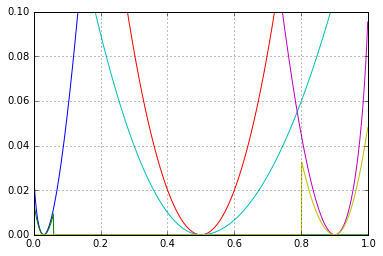

In [28]:
P=[0.03,0.5,0.9]
for p in P:
    plot(Q,array([DKL(q,p) for q in Q]))
    plot(Q,array([Mult(q,p) for q in Q]))
ylim([0,0.1])
#xlim([0,0.1])
grid();

## Comparing Sanov bound with the simulation

In [33]:
n=1000
p=0.01
A=array([1.]*int(p*n)+[0.]*int((1-p)*n))   #First p fraction of array are 1's, the rest are 0's.
print len(A)
print sum(A)


1000
10.0


There is no closed-form inverse for $D_{KL}$ we therefor use a numerical solver to find the upper and lower bounds around the true value.

In [38]:
from scipy.optimize import fsolve
def find_bounds(p,alpha,m):
    def func(q):
        return DKL(q,p)-delta
    delta=(1.0/m)*log(1.0/alpha)
    upper=fsolve(func,min(1,p+0.1))
    lower=fsolve(func,max(0,p-0.1))
    return lower,upper
find_bounds(0.4,0.1,1000)

(array([ 0.36692154]), array([ 0.43338562]))

In [39]:
p,n

(0.6, 1000)

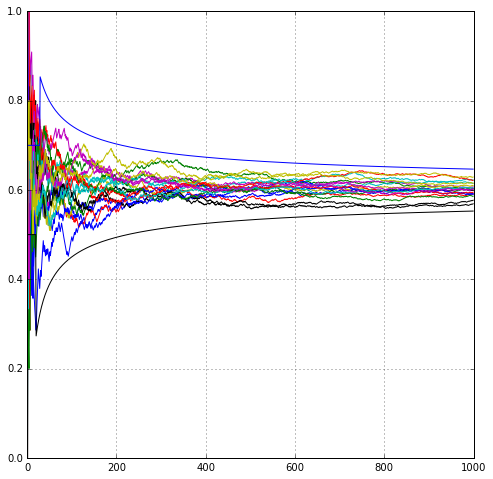

In [40]:
figure(figsize=(8,8))
k=20 # number of trials
p=0.6
n=1000
for i in range(k):
    plot(estimate(rand_bin_seq(p=p,n=n)))
ylim([0,1])
#xlim([0,400])
grid()

alpha=0.01
lower=[0]*n
upper=[0]*n
for t in range(n):
    lower[t],upper[t]=find_bounds(p,alpha,t+1)
plot(lower);
plot(upper);    

By playing around with the value of $p$ we can see how that the distance between $\hat{p}$ and $p$ is smaller when
$p$ is close to 0 or close to 1, a fact that is captured by Sanov bound but not by Hoeffding bound.

### Wilson Score Interval

The bounds we discussed so far consider only the number of elements in the sequence and the hypothesized probability $p$ into account. Better bounds can be achieved by also using the empirical probability $\hat{p}$ into account in the bound.

To reiterate, Suppose we flip a coin with unknown probability of heads $p$. We toss the coin $n$ times
and find that the fraction of tosses that are heads is $\hat{p}$. We would like to choose a segment around $\hat{p}$ such that the probability of the observed fraction of heads if the true $p$ is not inside the segment is at most a predefined small probability $\delta>0$.

Define $z>0$ to be the value such that $P(|X|>z)=\delta$ when $X$ is distributed according to the standard Normal Distribution ${\cal N}(0,1)$

The the **Wilson Score interval** is
$$
  \frac{1}{1 + \frac{1}{n} z^2}
  \left[
    \hat{p} + \frac{1}{2n} z^2 \pm
    z \sqrt{
      \frac{1}{n}\hat{p} \left(1 - \hat{p}\right) +
      \frac{1}{4n^2}z^2
    } 
   \right]
$$

For more on The wilson score interval see [wikipedia](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval) or [Interval Estimation for a Binomial Proportion / Brown, Cai & Dasgupta](http://projecteuclid.org/euclid.ss/1009213286)

In [41]:
from scipy.stats import norm
from numpy import sqrt
def Wilson(ph=0.7,n=100,alpha=0.99):   
    z=norm.ppf((1+alpha)/2.)
    radius=z*sqrt(ph*(1-ph)/n+z*z/(4*n*n))
    center=ph+z*z/(2*n)
    factor=(1/(1+z*z/n))
    return (factor*(center-radius),factor*(center+radius))
Wilson(n=100000)

(0.69625410004076793, 0.70371936213358521)

(0, 1)

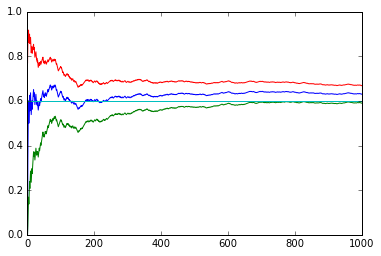

In [42]:
n=1000
p=0.6
Y=estimate(rand_bin_seq(p=p,n=n))
lower=[];upper=[]
for i in range(len(Y)):
    (l,u)=Wilson(ph=Y[i],n=i+1,alpha=0.99)
    lower.append(l)
    upper.append(u)
plot(Y)
plot(lower)
plot(upper)
plot([0,n-1],[p,p])
ylim([0,1])